# Library

In [74]:
import pandas as pd
import numpy as np
import chardet
from google.colab import drive
from google.colab import data_table

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_auc_score


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Binar x Kominfo Digitalent FGA Data Science

/content/drive/MyDrive/Binar x Kominfo Digitalent FGA Data Science


In [4]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Binar x Kominfo Digitalent FGA Data Science"

 count_plot.png		    lgbm_importances-01.png   test.csv
'hasil predict churn.csv'   plotcor.png		      train.csv


# Data

In [89]:
data_train = pd.read_csv('/content/drive/MyDrive/Binar x Kominfo Digitalent FGA Data Science/train.csv')
data_table.DataTable(data_train, include_index=False, num_rows_per_page=5)

Setiap baris berisi data pelanggan yang meninggalkan perusahaan (churn) atau tidak. Data train ini digunakan untuk melakukan prediksi terhadap kemungkinan seorang pelanggan churn.

**Keterangan** <br>
1. state : Negara bagian di Amerika Serikat tempat pelanggan tinggal. Disingkat dengan dua huruf.
2. account_length : Lama akun telah aktif dalam hari.
3. area_code : Tiga digit kode area dari nomor telepon pelanggan.
4. international_plan : Apakah pelanggan memiliki paket panggilan internasional? (yes/no).
5. voice_mail_plan : Apakah pelanggan memiliki fitur pesan suara? (yes/no)
6. number_vmail_messages : Perkiraan jumlah rata-rata pesan suara per bulan.
7. total_day_minutes : Jumlah total menit panggilan yang digunakan sepanjang hari.
8. total_day_calls : Jumlah total panggilan yang dilakukan sepanjang hari.
9. total_day_charge : Jumlah tagihan biaya panggilan sepanjang hari.
10. total_eve_minutes : Jumlah total menit panggilan yang digunakan pada malam hari.
11. total_eve_calls : Jumlah total panggilan yang dilakukan pada malam hari.
12. total_eve_charge : Jumlah tagihan biaya panggilan pada malam hari.
13. total_night_minutes : Jumlah total menit panggilan yang digunakan pada tengah malam.
14. total_night_calls : Jumlah total panggilan yang dilakukan pada tengah malam.
15. total_night_charge : Jumlah tagihan biaya panggilan pada tengah malam.
16. total_intl_minutes : Jumlah total menit panggilan internasional.
17. total_intl_calls : Jumlah total panggilan internasional.
18. total_intl_charge : Jumlah tagihan biaya panggilan internasional.
19. number_customer_service_calls : Jumlah panggilan yang dilakukan kepada _customer service_.
20. churn : Apakah pelanggan meninggalkan layanan? (yes/no, variabel target).

# EDA

## Data

In [6]:
data_train.shape

(4250, 20)

Data train terdiri dari 4250 baris (observasi) dan 20 kolom (variabel/fitur)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [8]:
data_train['number_customer_service_calls'] = data_train['number_customer_service_calls'].astype(object)

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Data memiliki 6 variabel kategorik dan 14 variabel numerik.

In [10]:
# Melihat deskripsi data
data_train.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  
count        4250.000000  
mean            2.769654  
std             0.745204  
min             0.000000  
25%             2.300000  
50%             2.780000  
75%             3.240000  
max             5.400000

Pada tabel di atas dapat diketahui sejumlah ukuran statistik untuk masing-masing variabel numerik.

In [11]:
def cekdata(dt, message):
    print(f'{message}:\n')
    print("Rows:", dt.shape[0])
    print("\nNumber of features:", dt.shape[1])
    print("\nFeatures:")
    print(data_train.columns.tolist())
    print("\nMissing values:", dt.isnull().sum().values.sum())
    print("\nUnique values:")
    print(dt.nunique())

In [12]:
cekdata(data_train, 'Memeriksa Data Train')

Memeriksa Data Train:

Rows: 4250

Number of features: 20

Features:
['state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn']

Missing values: 0

Unique values:
state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
tota

Menggunakan fungsi cekdata, fitur data, jumlah nilai unik, dan _missing values_ untuk setiap fitur dapat diketahui.

## Univariate : Memeriksa keseimbangan variabel target

In [13]:
# Menghitung customer churn yes/no
data_train['churn'].value_counts(normalize = True)

no     0.859294
yes    0.140706
Name: churn, dtype: float64

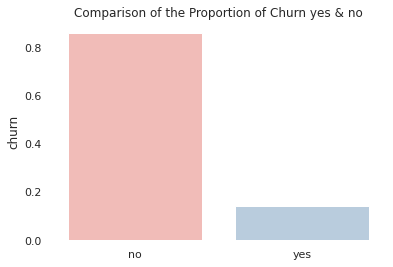

In [14]:
sns.set_style("white")
sns.barplot(x=data_train.churn.value_counts(normalize = True).index, y=data_train.churn.value_counts(normalize = True), palette = 'Pastel1').set_title('Comparison of the Proportion of Churn yes & no')
sns.despine(left=True, bottom = True)
plt.show()

## Bivariate

In [15]:
data = pd.read_csv('/content/drive/MyDrive/Binar x Kominfo Digitalent FGA Data Science/train.csv')
data['area_code'] = pd.Categorical(data['area_code'], ordered=True, categories=data['area_code'].unique().tolist())
data['international_plan'] = pd.Categorical(data['international_plan'], ordered=True, categories=data['international_plan'].unique().tolist())
data['voice_mail_plan'] = pd.Categorical(data['voice_mail_plan'], ordered=True, categories=data['voice_mail_plan'].unique().tolist())
data['churn'] = pd.Categorical(data['churn'], ordered=True, categories=data['churn'].unique().tolist())
data['count'] = np.ones(data.shape[0])

In [16]:
def stackedbarchart(column, df = data):
  sns.set_style("white")
  # from raw value to percentage
  total = data.groupby(column)['count'].sum().reset_index()
  #total = total.sort_values('count')
  churn = data[data.churn=='yes'].groupby(column)['count'].sum().reset_index()
  churn['count'] = [i / j * 100 for i,j in zip(churn['count'], total['count'])]
  total['count'] = [i / j * 100 for i,j in zip(total['count'], total['count'])]
  #sort
  total['temp'] = churn['count']
  total = total.sort_values('temp')
  total.drop(['temp'], axis = 1, inplace = True)
  churn = churn.sort_values('count')
  
  # bar chart 1 -> top bars (group of 'churn=No')
  bar1 = sns.barplot(x=column,  y="count", data=total, color='darkblue').set(ylabel = 'Percentage')
  
  # bar chart 2 -> bottom bars (group of 'churn=Yes')
  bar2 = sns.barplot(x=column, y="count", data=churn, color='lightblue').set(ylabel = 'Percentage')
  
  # add legend
  top_bar = mpatches.Patch(color='darkblue', label='churn = No')
  bottom_bar = mpatches.Patch(color='lightblue', label='churn = Yes')
  plt.legend(handles=[top_bar, bottom_bar])
  
  # show the graph
  sns.despine(left=True, bottom = True)
  plt.show()

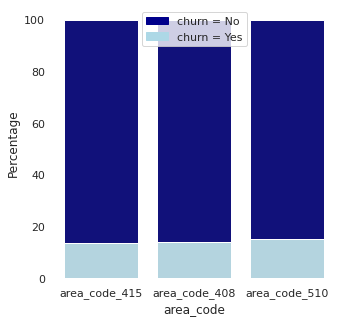

In [17]:
# set the figure size
plt.figure(figsize=(5, 5))
stackedbarchart('area_code')

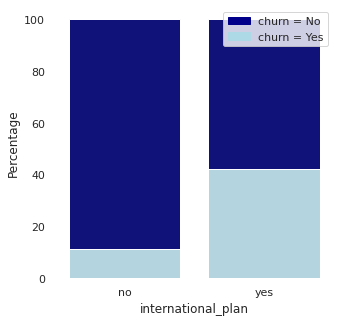

In [18]:
# set the figure size
plt.figure(figsize=(5, 5))
stackedbarchart('international_plan')

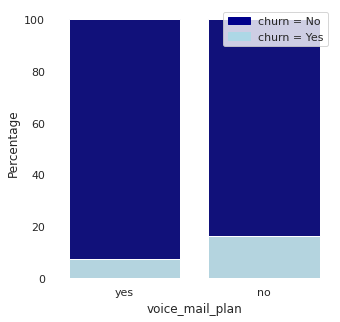

In [19]:
# set the figure size
plt.figure(figsize=(5, 5))
stackedbarchart('voice_mail_plan')

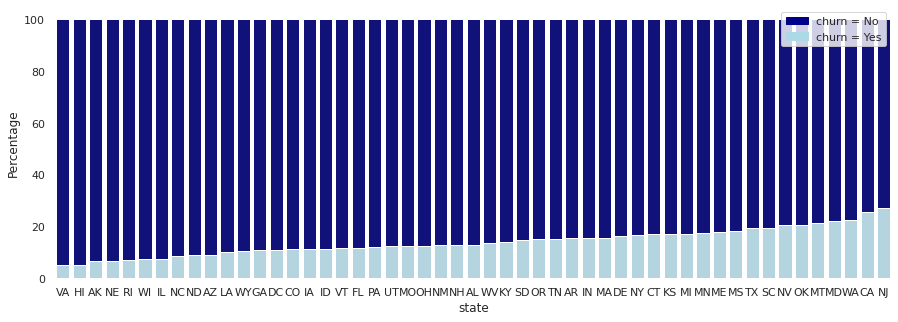

In [20]:
# set the figure size
plt.figure(figsize=(15, 5))
stackedbarchart('state')

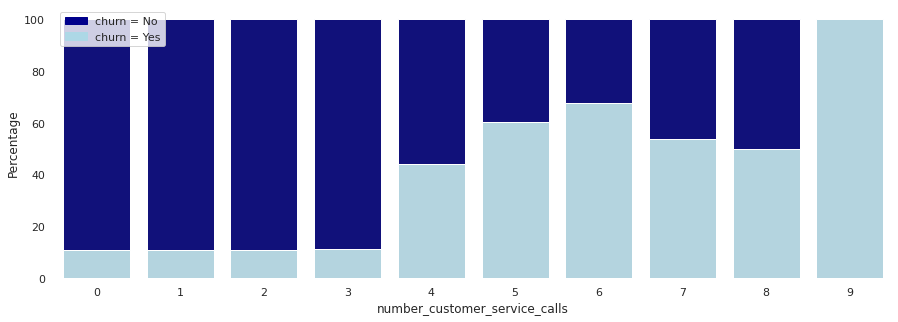

In [21]:
# set the figure size
plt.figure(figsize=(15, 5))
stackedbarchart('number_customer_service_calls')

In [22]:
def chisqtest(a, b ='churn'):
  contigency= pd.crosstab(data_train[a], data_train[b])
  c, p, dof, expected = chi2_contingency(contigency)
  # interpret p-value
  alpha = 0.05
  print("p value is " + str(p))
  if p <= alpha:
    print('There is a significant relation between ', a, ' and ', b, '.')
  else:
    print('There is no relation between ', a, ' and ', b, '.')

In [23]:
chisqtest('international_plan')

p value is 1.9831895448817517e-63
There is a significant relation between  international_plan  and  churn .


In [24]:
chisqtest('area_code')

p value is 0.5442605842955197
There is no relation between  area_code  and  churn .


In [25]:
chisqtest('voice_mail_plan')

p value is 1.139803854851859e-13
There is a significant relation between  voice_mail_plan  and  churn .


In [26]:
chisqtest('state')

p value is 0.0011690284839826976
There is a significant relation between  state  and  churn .


In [27]:
chisqtest('number_customer_service_calls')

p value is 6.1055858483387475e-87
There is a significant relation between  number_customer_service_calls  and  churn .


In [28]:
data_train["churn"] = np.where(data_train["churn"] == "yes", 1, 0)

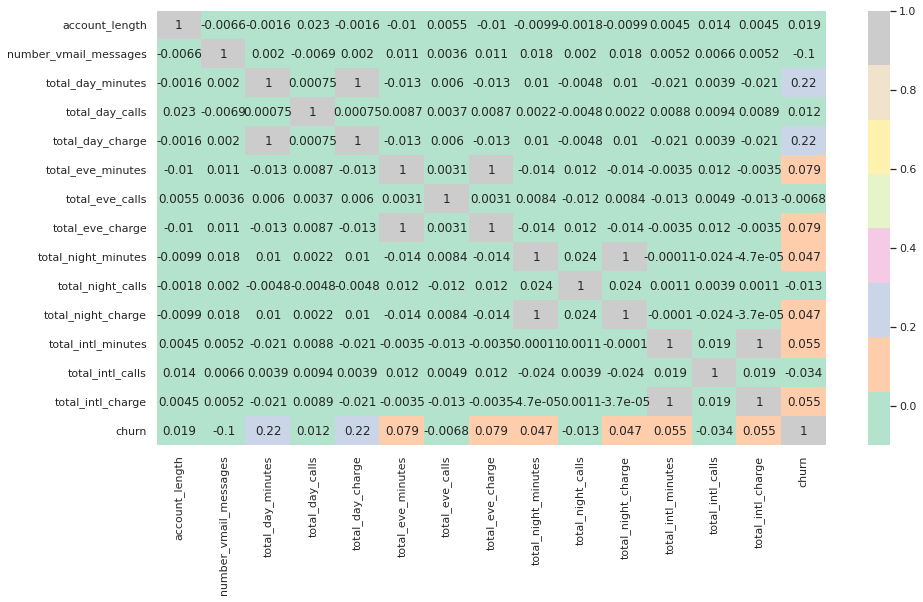

In [29]:
plt.figure(figsize = (15, 8))
corr = data_train.corr()
sns.heatmap(data = corr, annot = True, cmap = 'Pastel2')
plt.savefig("plotcor.png")
plt.show()

Korelasi kuat positif ditemukan antara pasangan total tagihan biaya dan panggilan siang, malam, tengah malam, dan internasional.

In [30]:
data_train["churn"] = np.where(data_train["churn"] == 1, 'yes', 'no')

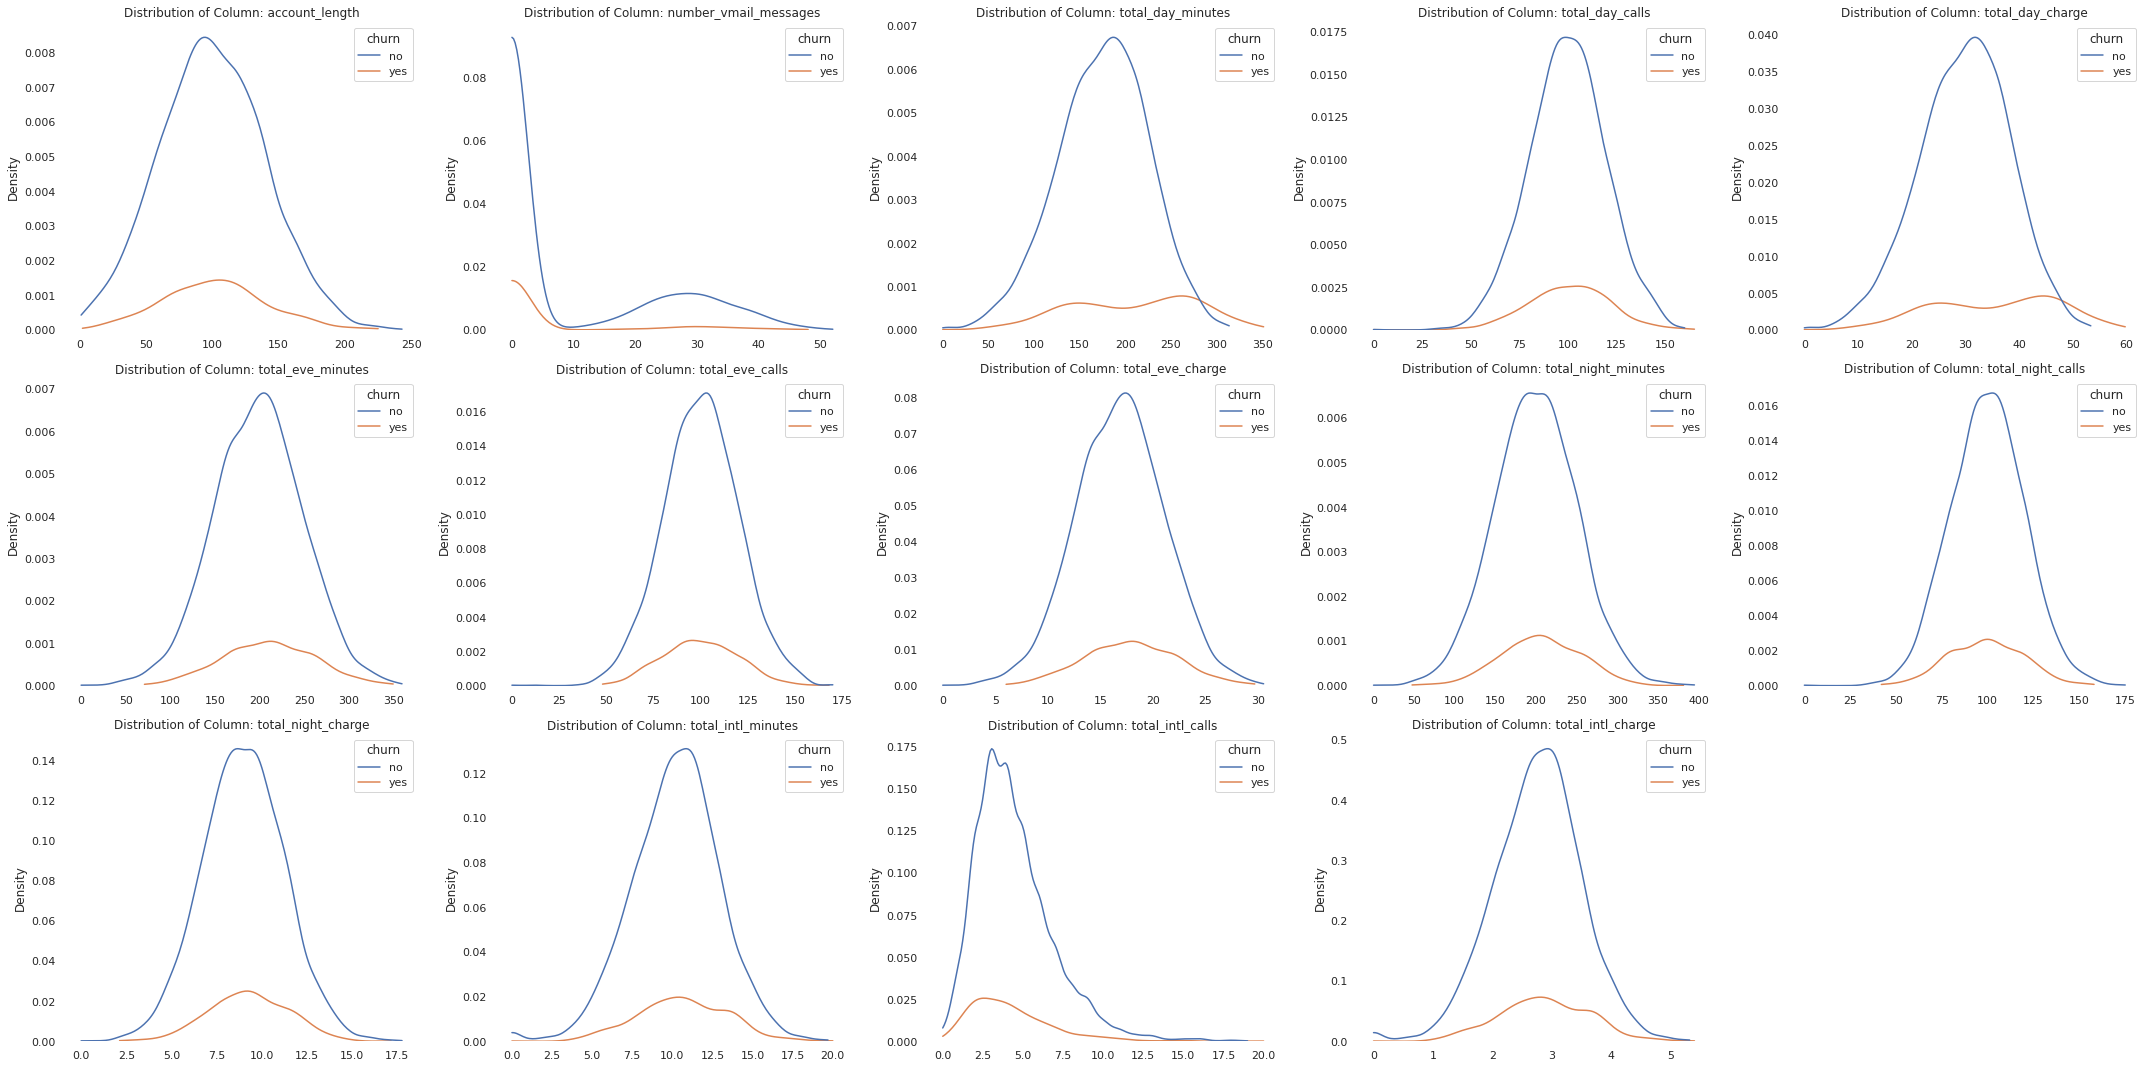

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(30, 15), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D

target_col = ['churn']
cat_cols = data_train.nunique()[data_train.nunique() <= 10].keys().tolist()
cat_cols = cat_cols + ['state']
cat_cols = [x for x in cat_cols if x not in target_col]
cols = [x for x in data_train.columns if x not in cat_cols + target_col]

for col, ax in zip(cols, axes):
    data = data_train[[col, 'churn']]  # select the data
    sns.set_style("white")
    sns.kdeplot(data=data, x=col, hue='churn', shade=False, ax=ax, cut = 0)
    sns.despine(left=True, bottom = True)
    ax.set(title=f'Distribution of Column: {col}', xlabel=None)
    
fig.delaxes(axes[14])  # delete the empty subplot
fig.tight_layout()
plt.show()

In [32]:
def overlaykde(column, data):
  fig, ax = plt.subplots()
  sns.set_style("white")
  sns.kdeplot(data.query('churn == "yes"')[column], ax=ax, label = 'churn', cut = 0, color = 'orange')
  sns.kdeplot(data.query('churn == "no"')[column], ax=ax, label = 'retain', cut = 0, color = 'darkblue')
  plt.legend()
  sns.despine(left=True, bottom = True)
  plt.show()

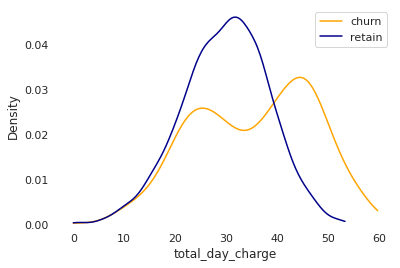

In [33]:
overlaykde('total_day_charge', data_train)

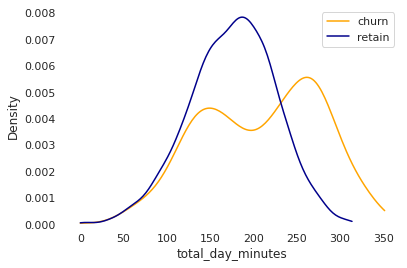

In [34]:
overlaykde('total_day_minutes', data_train)

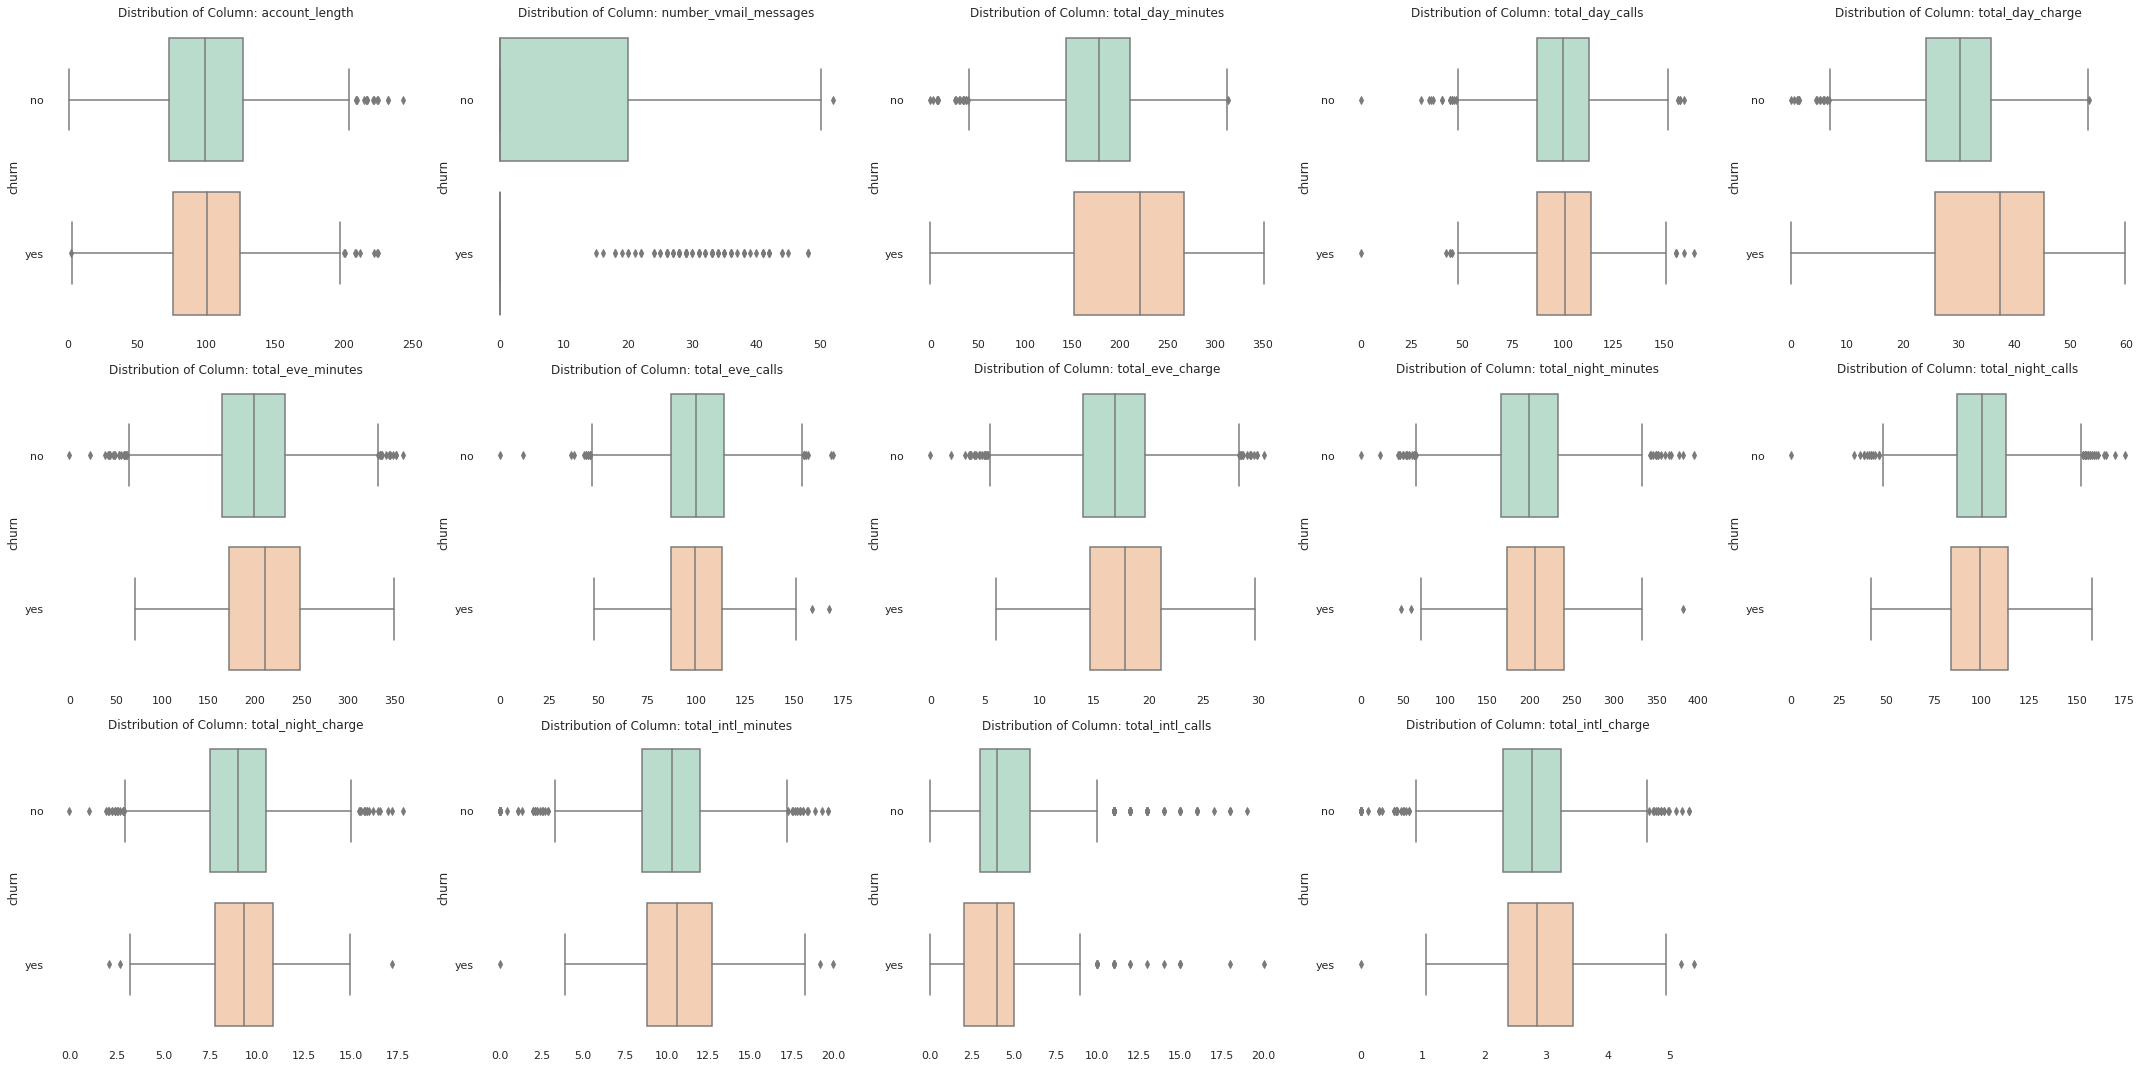

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(30, 15), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D

target_col = ['churn']
cat_cols = data_train.nunique()[data_train.nunique() <= 10].keys().tolist()
cat_cols = cat_cols + ['state']
cat_cols = [x for x in cat_cols if x not in target_col]
cols = [x for x in data_train.columns if x not in cat_cols + target_col]

for col, ax in zip(cols, axes):
    data = data_train[[col, 'churn']]  # select the data
    sns.set_style("white")
    sns.boxplot(data=data, x=col, y='churn', palette = 'Pastel2', ax = ax)
    sns.despine(left=True, bottom = True)
    ax.set(title=f'Distribution of Column: {col}', xlabel=None)
    
fig.delaxes(axes[14])  # delete the empty subplot
fig.tight_layout()
plt.show()

# Pre-processing

In [36]:
data = data_train
data.drop_duplicates(inplace = True)

In [37]:
data.drop(columns = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'], axis = 1, inplace = True)
data.drop(columns = ['area_code', 'voice_mail_plan'], axis = 1, inplace = True)

In [38]:
# Encoding Variabel

#Separating categorical and numerical columns
target_col = ["churn"]
cat_cols   = data.nunique()[data.nunique() <= 10].keys().tolist()
cat_cols = cat_cols + ['state']
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]

#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()

#multinomial columns
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Label encoding for nominal multi value columns
data=pd.get_dummies(data = data,columns = multi_cols,drop_first=True)

In [39]:
data.head()

account_length  international_plan  number_vmail_messages  total_day_calls  \
0             107                   0                     26              123   
1             137                   0                      0              114   
2              84                   1                      0               71   
3              75                   1                      0              113   
4             121                   0                     24               88   

   total_day_charge  total_eve_calls  total_eve_charge  total_night_calls  \
0             27.47              103             16.62                103   
1             41.38              110             10.30                104   
2             50.90               88              5.26                 89   
3             28.34              122             12.61                121   
4             37.09              108             29.62                118   

   total_night_charge  total_intl_calls  ...  state_SD  state_TN  state_TX  \
0               11.45                 3  ...         0         0         0   
1                7.32                 5  ...         0         0         0   
2                8.86                 7  ...         0         0         0   
3                8.41                 3  ...         0         0         0   
4                9.57                 7  ...         0         0         0   

   state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  
0         0         0         0         0         0         0         0  
1         0         0         0         0         0         0         0  
2         0         0         0         0         0         0         0  
3         0         0         0         0         0         0         0  
4         0         0         0         0         0         0         0  

[5 rows x 71 columns]

In [40]:
##partition data into data training and data testing
train,test = train_test_split(data, test_size = .30 ,random_state = 111)
    
##seperating dependent and independent variables on training and testing data
cols    = [i for i in data.columns if i not in target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

In [41]:
train_Y["churn"].value_counts()

0    2555
1     420
Name: churn, dtype: int64

In [42]:
#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=cols)
train_smote_Y = pd.DataFrame(data = train_smote_Y,columns=target_col)

In [43]:
train_smote_Y["churn"].value_counts()

0    2555
1    2555
Name: churn, dtype: int64

# Model

In [44]:
def roc_auc(y_test, y_prediction):
    print("ROC_AUC : ", roc_auc_score(y_test, y_prediction))

In [45]:
# SVM No SMOTE
SVC = svm.SVC().fit(train_X, train_Y)
print("Score : ", SVC.score(test_X, test_Y))
roc_auc(test_Y, SVC.predict(test_X))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score :  0.8603921568627451
ROC_AUC :  0.5


In [46]:
target_names = ['no', 'yes']
print(classification_report(test_Y, SVC.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.86      1.00      0.92      1097
         yes       0.00      0.00      0.00       178

    accuracy                           0.86      1275
   macro avg       0.43      0.50      0.46      1275
weighted avg       0.74      0.86      0.80      1275



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# SVM SMOTE
SVC = svm.SVC().fit(train_smote_X, train_smote_Y)
print("Score : ", SVC.score(test_X, test_Y))
roc_auc(test_Y, SVC.predict(test_X))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score :  0.7027450980392157
ROC_AUC :  0.6554725349011092


In [48]:
target_names = ['no', 'yes']
print(classification_report(test_Y, SVC.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.92      0.72      0.81      1097
         yes       0.26      0.59      0.36       178

    accuracy                           0.70      1275
   macro avg       0.59      0.66      0.58      1275
weighted avg       0.82      0.70      0.74      1275



In [49]:
# DT No SMOTE
DT = DecisionTreeClassifier().fit(train_X, train_Y)
print("Score : ", DT.score(test_X, test_Y))
roc_auc(test_Y, DT.predict(test_X))

Score :  0.9176470588235294
ROC_AUC :  0.8203629920211404


In [50]:
target_names = ['no', 'yes']
print(classification_report(test_Y, DT.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.95      0.96      0.95      1097
         yes       0.71      0.69      0.70       178

    accuracy                           0.92      1275
   macro avg       0.83      0.82      0.83      1275
weighted avg       0.92      0.92      0.92      1275



In [51]:
# DT SMOTE
DT = DecisionTreeClassifier().fit(train_smote_X, train_smote_Y)
print("Score : ", DT.score(test_X, test_Y))
roc_auc(test_Y, DT.predict(test_X))

Score :  0.8156862745098039
ROC_AUC :  0.6928676779367632


In [52]:
target_names = ['no', 'yes']
print(classification_report(test_Y, DT.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.92      0.86      0.89      1097
         yes       0.38      0.52      0.44       178

    accuracy                           0.82      1275
   macro avg       0.65      0.69      0.67      1275
weighted avg       0.84      0.82      0.83      1275



In [53]:
# RF No SMOTE
RF = RandomForestClassifier().fit(train_X, train_Y)
print("Score : ", RF.score(test_X, test_Y))
roc_auc(test_Y, RF.predict(test_X))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score :  0.9286274509803921
ROC_AUC :  0.7679140249710651


In [54]:
target_names = ['no', 'yes']
print(classification_report(test_Y, RF.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.93      0.99      0.96      1097
         yes       0.91      0.54      0.68       178

    accuracy                           0.93      1275
   macro avg       0.92      0.77      0.82      1275
weighted avg       0.93      0.93      0.92      1275



In [55]:
# RF SMOTE
RF = RandomForestClassifier().fit(train_smote_X, train_smote_Y)
print("Score : ", RF.score(test_X, test_Y))
roc_auc(test_Y, RF.predict(test_X))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score :  0.8784313725490196
ROC_AUC :  0.7081519568178792


In [56]:
target_names = ['no', 'yes']
print(classification_report(test_Y, RF.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.92      0.94      0.93      1097
         yes       0.58      0.47      0.52       178

    accuracy                           0.88      1275
   macro avg       0.75      0.71      0.73      1275
weighted avg       0.87      0.88      0.87      1275



In [57]:
# KNN No SMOTE
KNN = KNeighborsClassifier().fit(train_X, train_Y)
print("Score : ", KNN.score(test_X, test_Y))
roc_auc(test_Y, KNN.predict(test_X))

Score :  0.8580392156862745


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ROC_AUC :  0.5315774379564286


In [58]:
target_names = ['no', 'yes']
print(classification_report(test_Y, KNN.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.87      0.98      0.92      1097
         yes       0.45      0.08      0.13       178

    accuracy                           0.86      1275
   macro avg       0.66      0.53      0.53      1275
weighted avg       0.81      0.86      0.81      1275



In [59]:
# KNN SMOTE
KNN = KNeighborsClassifier().fit(train_smote_X, train_smote_Y)
print("Score : ", KNN.score(test_X, test_Y))
roc_auc(test_Y, KNN.predict(test_X))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score :  0.6572549019607843
ROC_AUC :  0.584325996333207


In [60]:
target_names = ['no', 'yes']
print(classification_report(test_Y, KNN.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.89      0.69      0.77      1097
         yes       0.20      0.48      0.28       178

    accuracy                           0.66      1275
   macro avg       0.55      0.58      0.53      1275
weighted avg       0.79      0.66      0.71      1275



In [61]:
# LogReg No SMOTE
LogReg = LogisticRegression().fit(train_X, train_Y)
print("Score : ", LogReg.score(test_X, test_Y))
roc_auc(test_Y, LogReg.predict(test_X))

Score :  0.8533333333333334
ROC_AUC :  0.571200311370131


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [62]:
target_names = ['no', 'yes']
print(classification_report(test_Y, LogReg.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.88      0.96      0.92      1097
         yes       0.44      0.18      0.25       178

    accuracy                           0.85      1275
   macro avg       0.66      0.57      0.59      1275
weighted avg       0.82      0.85      0.83      1275



In [63]:
# LogReg SMOTE
LogReg = LogisticRegression().fit(train_smote_X, train_smote_Y)
print("Score : ", LogReg.score(test_X, test_Y))
roc_auc(test_Y, LogReg.predict(test_X))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score :  0.7207843137254902
ROC_AUC :  0.6283044667274384


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [64]:
target_names = ['no', 'yes']
print(classification_report(test_Y, LogReg.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.90      0.76      0.82      1097
         yes       0.25      0.50      0.33       178

    accuracy                           0.72      1275
   macro avg       0.58      0.63      0.58      1275
weighted avg       0.81      0.72      0.75      1275



In [65]:
# XGB No SMOTE
XGB = xgb.XGBClassifier(objective="binary:logistic").fit(train_X, train_Y)
XGB.score(test_X, test_Y)
print("Score : ", XGB.score(test_X, test_Y))
roc_auc(test_Y, XGB.predict(test_X))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score :  0.9419607843137255
ROC_AUC :  0.8109604334599981


In [66]:
target_names = ['no', 'yes']
print(classification_report(test_Y, XGB.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.94      0.99      0.97      1097
         yes       0.93      0.63      0.75       178

    accuracy                           0.94      1275
   macro avg       0.94      0.81      0.86      1275
weighted avg       0.94      0.94      0.94      1275



In [67]:
# XGB SMOTE
XGB = xgb.XGBClassifier(objective="binary:logistic").fit(train_smote_X, train_smote_Y)
XGB.score(test_X, test_Y)
print("Score : ", XGB.score(test_X, test_Y))
roc_auc(test_Y, XGB.predict(test_X))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score :  0.7890196078431373
ROC_AUC :  0.7432604754539961


In [68]:
target_names = ['no', 'yes']
print(classification_report(test_Y, XGB.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.94      0.81      0.87      1097
         yes       0.36      0.68      0.47       178

    accuracy                           0.79      1275
   macro avg       0.65      0.74      0.67      1275
weighted avg       0.86      0.79      0.81      1275



In [69]:
# LGB No SMOTE
LGB = lgb.LGBMClassifier().fit(train_X, train_Y)
LGB.score(test_X, test_Y)
print("Score : ", LGB.score(test_X, test_Y))
roc_auc(test_Y, LGB.predict(test_X))
model = LGB

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score :  0.956078431372549
ROC_AUC :  0.8544626304630606


In [70]:
target_names = ['no', 'yes']
print(classification_report(test_Y, LGB.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.96      1.00      0.97      1097
         yes       0.96      0.71      0.82       178

    accuracy                           0.96      1275
   macro avg       0.96      0.85      0.90      1275
weighted avg       0.96      0.96      0.95      1275



In [71]:
# LGB SMOTE
LGB = lgb.LGBMClassifier().fit(train_smote_X, train_smote_Y)
LGB.score(test_X, test_Y)
print("Score : ", LGB.score(test_X, test_Y))
roc_auc(test_Y, LGB.predict(test_X))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score :  0.9286274509803921
ROC_AUC :  0.8385100324685301


In [72]:
target_names = ['no', 'yes']
print(classification_report(test_Y, LGB.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

          no       0.95      0.96      0.96      1097
         yes       0.76      0.71      0.74       178

    accuracy                           0.93      1275
   macro avg       0.86      0.84      0.85      1275
weighted avg       0.93      0.93      0.93      1275



In [73]:
# Best Model : LGB No SMOTE
from sklearn.model_selection import cross_val_score
from sklearn import metrics

scores = cross_val_score(model, train_X, train_Y.to_numpy().ravel(), cv = 5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.95294118 0.94957983 0.94789916 0.92436975 0.94621849]
0.94 accuracy with a standard deviation of 0.01


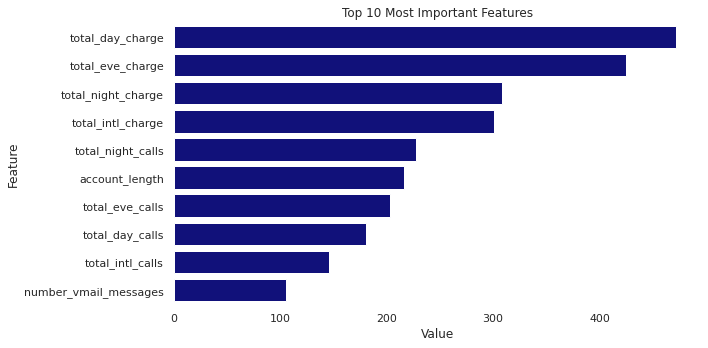

In [88]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, 
                                      train_X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 5))
sns.set_style("white")
sns.barplot(x="Value", y="Feature", 
            data=feature_imp.sort_values(by="Value", ascending=False).iloc[0:10,:],
            color = 'darkblue')
plt.title('Top 10 Most Important Features')
sns.despine(left=True, bottom = True)
plt.tight_layout()
plt.show()

# Referensi

1. Hasabo, I. (2019). Data Science Life Cycle for Customer Churn. Diakses tanggal 11 Oktober 2022 dari https://medium.com/@islamhasabo/predicting-customer-churn-bc76f7760377
2. Venkatesan, R. (2021). EDA on Telecom Churn. Diakses tanggal 11 Oktober 2022 dari https://www.kaggle.com/code/rohitvenk/eda-on-telecom-churn
3. McKinney, T. (2020). Diakses tanggal 11 Oktober 2022 dari https://stackoverflow.com/questions/63895392/seaborn-is-not-plotting-within-defined-subplots
4. https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

#-------------------------------------------------------------------------------------------------------------------------- 😼 😼 😼